<a href="https://colab.research.google.com/github/Spencer166/Capstone/blob/main/Step_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, ConfusionMatrixDisplay

In [5]:
# Path to the dataset
file_path = "/content/drive/MyDrive/train.csv"

# Load into DataFrame
df_full = pd.read_csv(file_path)

# Sample 100,000 rows
df = df_full.sample(n=100000, random_state=1)

# Drop id column
df = df.drop('id', axis=1)

# Display first few rows
print(df.shape)
df.head()

(100000, 12)


,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
566215,52233.83,0.125,663,7454.22,14.89,Female,Married,PhD,Employed,Education,D2,1.0
123502,29247.24,0.127,639,20391.28,12.29,Male,Married,High School,Unemployed,Debt consolidation,D2,0.0
367747,13802.88,0.164,736,17984.01,11.00,Male,Single,Bachelor's,Self-employed,Home,C5,1.0
359153,48758.31,0.090,707,10209.48,10.17,Female,Married,Bachelor's,Employed,Debt consolidation,C2,1.0
440880,49816.42,0.090,665,18123.14,16.06,Male,Single,High School,Employed,Debt consolidation,D4,1.0


In [6]:
# Define Target
target = "loan_paid_back"

# Split into features and Target
X = df.drop(columns=[target])
y = df[target]

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)

# Separate numeric and categorical columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns


# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop="first",handle_unknown='ignore'), cat_cols)])

In [7]:
# Gradient Boosting model with fixed hyperparameters
gb_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=4,
    n_estimators=200,
    random_state=42)


# Create pipeline with Gradient Boosting Classifier
pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", gb_model)])

# Fit to the training data
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount',
       'interest_rate'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['gender', 'marital_status', 'education_level', 'employment_status',
       'loan_purpose', 'grade_subgrade'],
      dtype='object'))])),
                ('model',
                 GradientBoostingClassifier(max_depth=4, n_estimators=200,
                                            random_state=42))])

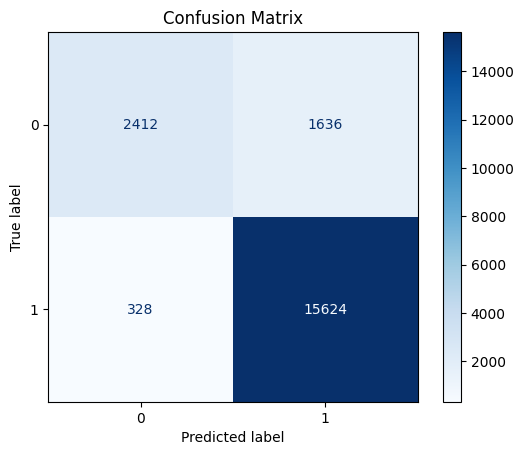

ROC-AUC: 0.915371686328749
Accuracy: 0.9018

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.60      0.71      4048
         1.0       0.91      0.98      0.94     15952

    accuracy                           0.90     20000
   macro avg       0.89      0.79      0.83     20000
weighted avg       0.90      0.90      0.89     20000



In [9]:
# Define predictions and probabilities
y_prob = pipe.predict_proba(X_test)[:, 1]
y_pred = pipe.predict(X_test)


# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Define metrics
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

# Print metrics
print("ROC-AUC:", roc)
print("Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))